In [24]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import keras.utils as image
from sklearn.metrics import confusion_matrix

In [25]:
# Load the LFW dataset
faces = fetch_lfw_people(min_faces_per_person=100, resize=1.0, slice_=(slice(60, 188), slice(60, 188)), color=True)
class_count = len(faces.target_names)


In [26]:
# Display target names and images shape
print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 128, 128, 3)


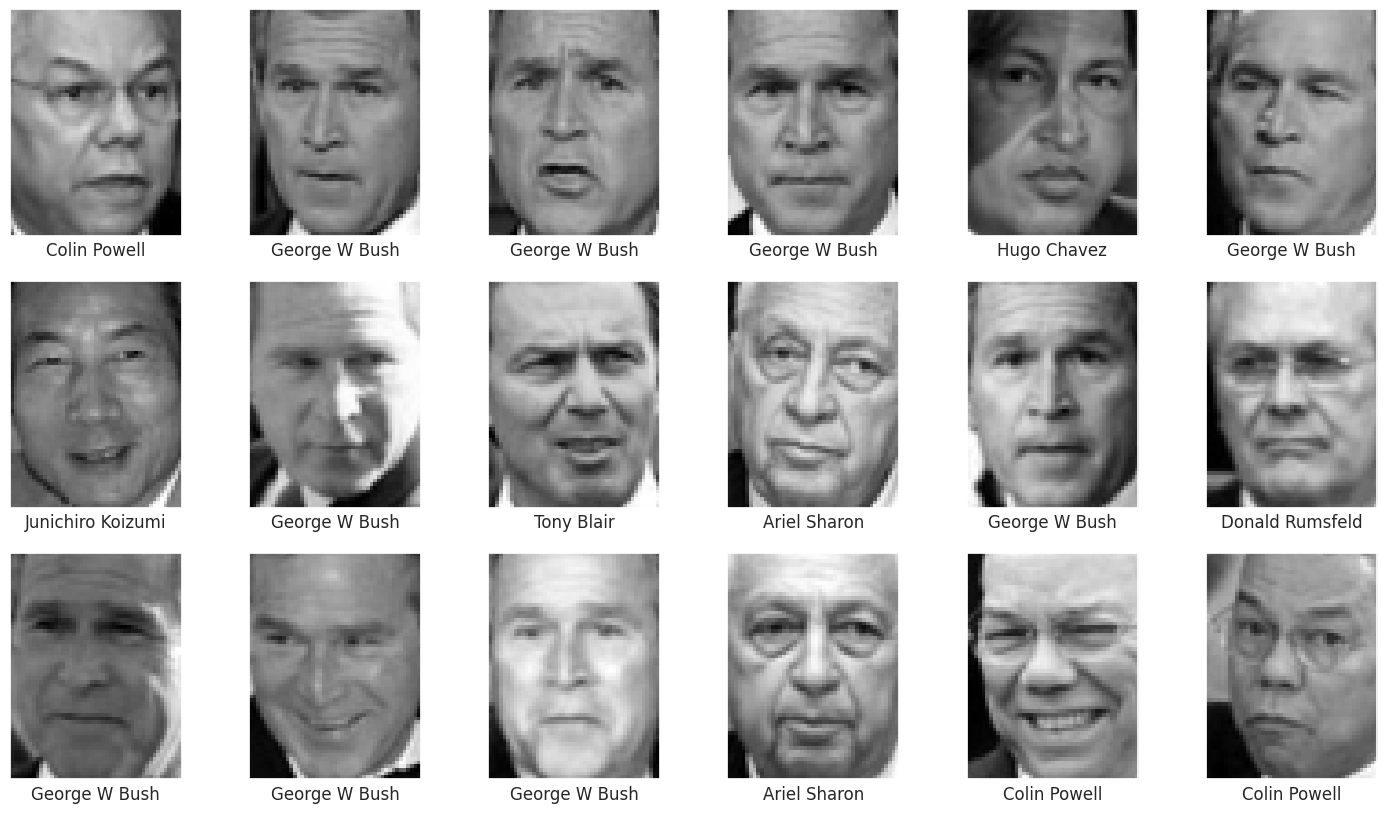

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Assuming you're using the 'faces' dataset from sklearn
faces = datasets.fetch_lfw_people(min_faces_per_person=60)

sns.set()
fig, ax = plt.subplots(3, 6, figsize=(18, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')  # Assuming grayscale images
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

plt.show()


<Axes: >

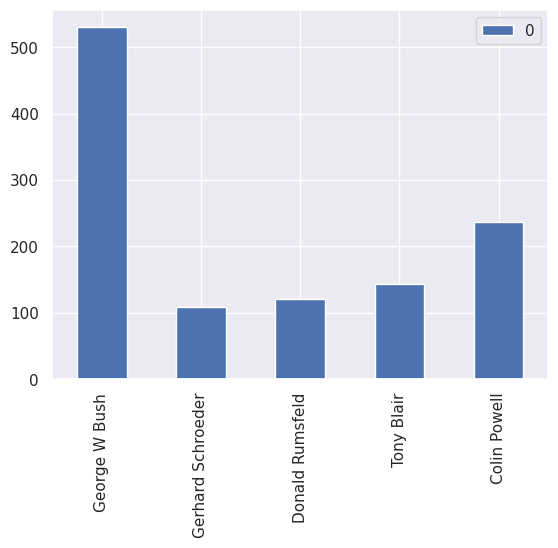

In [6]:
# Count class occurrences and create DataFrame
counts = Counter(faces.target)
names = {faces.target_names[key]: counts[key] for key in counts.keys()}
df = pd.DataFrame.from_dict(names, orient='index')
df.plot(kind='bar')

In [7]:
# Mask to balance classes
mask = np.zeros(faces.target.shape, dtype=np.bool_)
for target in np.unique(faces.target):
    mask[np.where(faces.target == target)[0][:100]] = 1


In [8]:
# Prepare data for training
x_faces = faces.data[mask]
y_faces = faces.target[mask]
x_faces = np.reshape(x_faces, (x_faces.shape[0], faces.images.shape[1], faces.images.shape[2], faces.images.shape[3]))
face_images = x_faces / 255  # Normalize pixel values
face_labels = to_categorical(y_faces)
x_train, x_test, y_train, y_test = train_test_split(face_images, face_labels, train_size=0.8, stratify=face_labels, random_state=0)


In [9]:
# Define and compile the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(face_images.shape[1:])),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(class_count, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

Epoch 1/20
16/16 [==============================] - 9s 44ms/step - loss: 1.6159 - accuracy: 0.1700 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 2/20
16/16 [==============================] - 0s 22ms/step - loss: 1.6098 - accuracy: 0.1950 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 3/20
16/16 [==============================] - 0s 25ms/step - loss: 1.6098 - accuracy: 0.2000 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 4/20
16/16 [==============================] - 0s 25ms/step - loss: 1.6097 - accuracy: 0.2000 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 1.6096 - accuracy: 0.1875 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 6/20
16/16 [==============================] - 0s 23ms/step - loss: 1.6097 - accuracy: 0.1850 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 7/20
16/16 [==============================] - 1s 32ms/step - loss: 1.6095 - accuracy: 0.2000 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 8/20
16

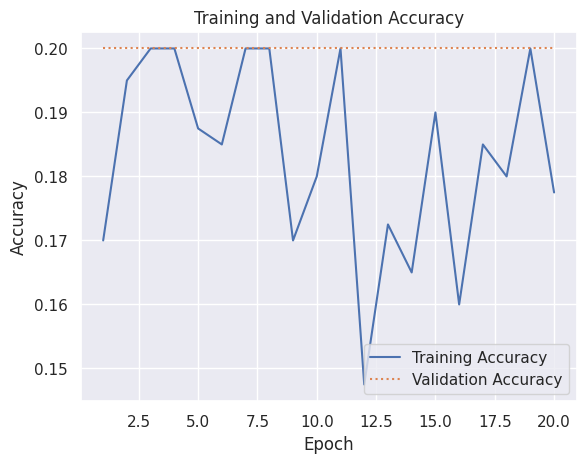

In [10]:
# Train the model
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=25)

# Plot training and validation accuracy
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

4/4 [==============================] - 1s 54ms/step


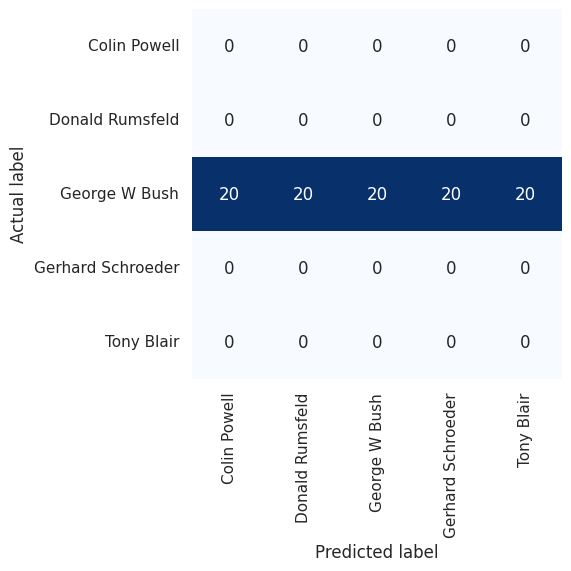

In [11]:
# Generate confusion matrix
y_predicted = model.predict(x_test)
mat = confusion_matrix(y_test.argmax(axis=1), y_predicted.argmax(axis=1))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

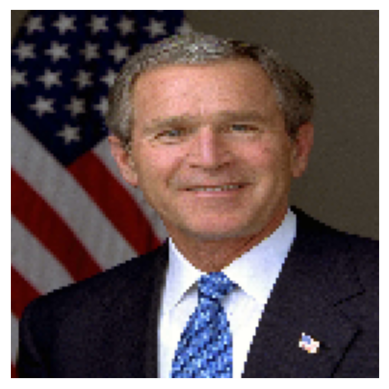

1/1 [==============================] - 1s 533ms/step
Colin Powell: 0.17008656
Donald Rumsfeld: 0.21676096
George W Bush: 0.2547028
Gerhard Schroeder: 0.19355042
Tony Blair: 0.16489924


In [18]:
# Predict class for a sample image
x = image.load_img('/content/george.jpeg', target_size=(face_images.shape[1:]))
plt.xticks([])
plt.yticks([])
plt.imshow(x)
plt.show()
x = image.img_to_array(x) / 255
x = np.expand_dims(x, axis=0)
y = model.predict(x)[0]
for i in range(len(y)):
    print(faces.target_names[i] + ': ' + str(y[i]))


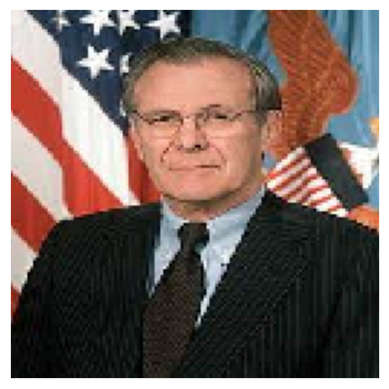

1/1 [==============================] - 0s 18ms/step
Colin Powell: 0.17429926
Donald Rumsfeld: 0.21540454
George W Bush: 0.25946978
Gerhard Schroeder: 0.18946823
Tony Blair: 0.16135818


In [27]:
# Predict class for a sample image
x = image.load_img('/content/download.jpg', target_size=(face_images.shape[1:]))
plt.xticks([])
plt.yticks([])
plt.imshow(x)
plt.show()
x = image.img_to_array(x) / 255
x = np.expand_dims(x, axis=0)
y = model.predict(x)[0]
for i in range(len(y)):
    print(faces.target_names[i] + ': ' + str(y[i]))


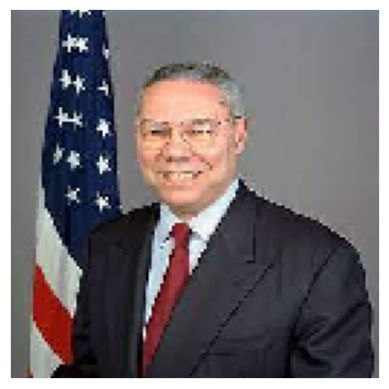

1/1 [==============================] - 0s 18ms/step
Colin Powell: 0.16961725
Donald Rumsfeld: 0.22004522
George W Bush: 0.25929517
Gerhard Schroeder: 0.19000676
Tony Blair: 0.16103557


In [28]:
# Predict class for a sample image
x = image.load_img('/content/colin.jpg', target_size=(face_images.shape[1:]))
plt.xticks([])
plt.yticks([])
plt.imshow(x)
plt.show()
x = image.img_to_array(x) / 255
x = np.expand_dims(x, axis=0)
y = model.predict(x)[0]
for i in range(len(y)):
    print(faces.target_names[i] + ': ' + str(y[i]))
